In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("data/train_ver2.csv")

c:\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
train.shape

(13647309, 48)

In [5]:
len=train.shape[0]
print(len)
len//=2
print(len)
train=train[:len]

13647309
6823654


In [6]:
for col in train.columns:
    print(train[col].head())

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object
0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64
0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object
0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object
0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object
0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object
0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64
0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: object
0    A
1

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823654 entries, 0 to 6823653
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1    

In [8]:
train.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,6.823654e+06,6.795920e+06,6.795920e+06,6795920.0,6.760922e+06,6.795920e+06,5.597791e+06,6.823654e+06,6.823654e+06,6.823654e+06,...,6.823654e+06,6.823654e+06,6.823654e+06,6.823654e+06,6.823654e+06,6.823654e+06,6.823654e+06,6.807591e+06,6.807591e+06,6.823654e+06
mean,8.193879e+05,4.054006e-02,1.155423e+00,1.0,2.656423e+01,4.887984e-01,1.335070e+05,1.150410e-04,2.652538e-05,7.083356e-01,...,6.474244e-03,9.909207e-03,2.932300e-03,5.493596e-02,4.868477e-02,2.691359e-02,4.242448e-03,5.854215e-02,6.344520e-02,1.351497e-01
std,4.169409e+05,1.972221e-01,3.899657e+00,0.0,1.277993e+01,4.998745e-01,2.283270e+05,1.072510e-02,5.150211e-03,4.545287e-01,...,8.020180e-02,9.905057e-02,5.407127e-02,2.278552e-01,2.152082e-01,1.618309e-01,6.499577e-02,2.347658e-01,2.437620e-01,3.418835e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.432392e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.846343e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.356320e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.013965e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.175984e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.552243e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.495489e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
a = [col for col in train.columns[:24] if train[col].dtype in ['O']]
        

In [10]:
train[a].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,6823654,6795920,6795920,6795889,6823654,6795920,6823654,10778,6718857.0,6718857,6795920,6795920,885,6705966,6795920,6760922,6705050
unique,10,5,116,2,232,6541,499,83,13.0,5,2,2,2,160,2,52,3
top,2015-09-28,N,ES,V,23,2014-07-28,21,2015-07-09,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,865440,6791472,6760919,3700614,237202,33373,118544,443,4714626.0,3456453,6760920,6483605,876,2271890,6779201,2171589,3908380


In [11]:
# for col in a:
#     uniq=np.unique(train[col].astype(str))
#     print("-"*50)
#     print("# cols {}, n_uniq {}, uniq {}".format(col,len(uniq),uniq))

In [12]:
# skip_cols=["ncodpers","renta"]
# for col in train.columns:
#     if col in skip_cols:
#         continue
#     print("-"*50)
#     print("col:",col)
    
#     f,ax=plt.subplots(figsize=(20,15))
#     plt.xticks(fontsize=12,rotation=90)
#     sns.countplot(x=col,data=train,alpha=0.5)
#     plt.show()

--------------------------------------------------
col: fecha_dato


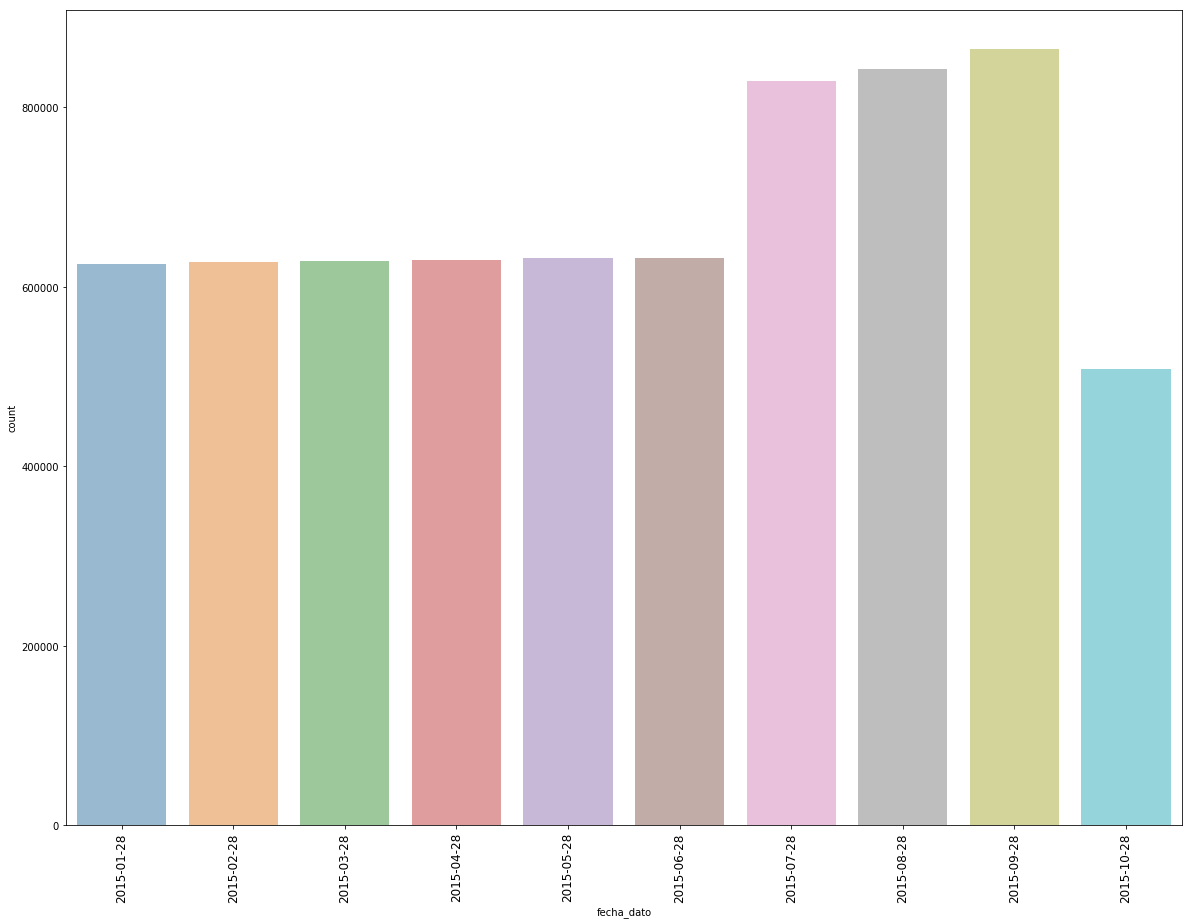

--------------------------------------------------
col: ind_empleado


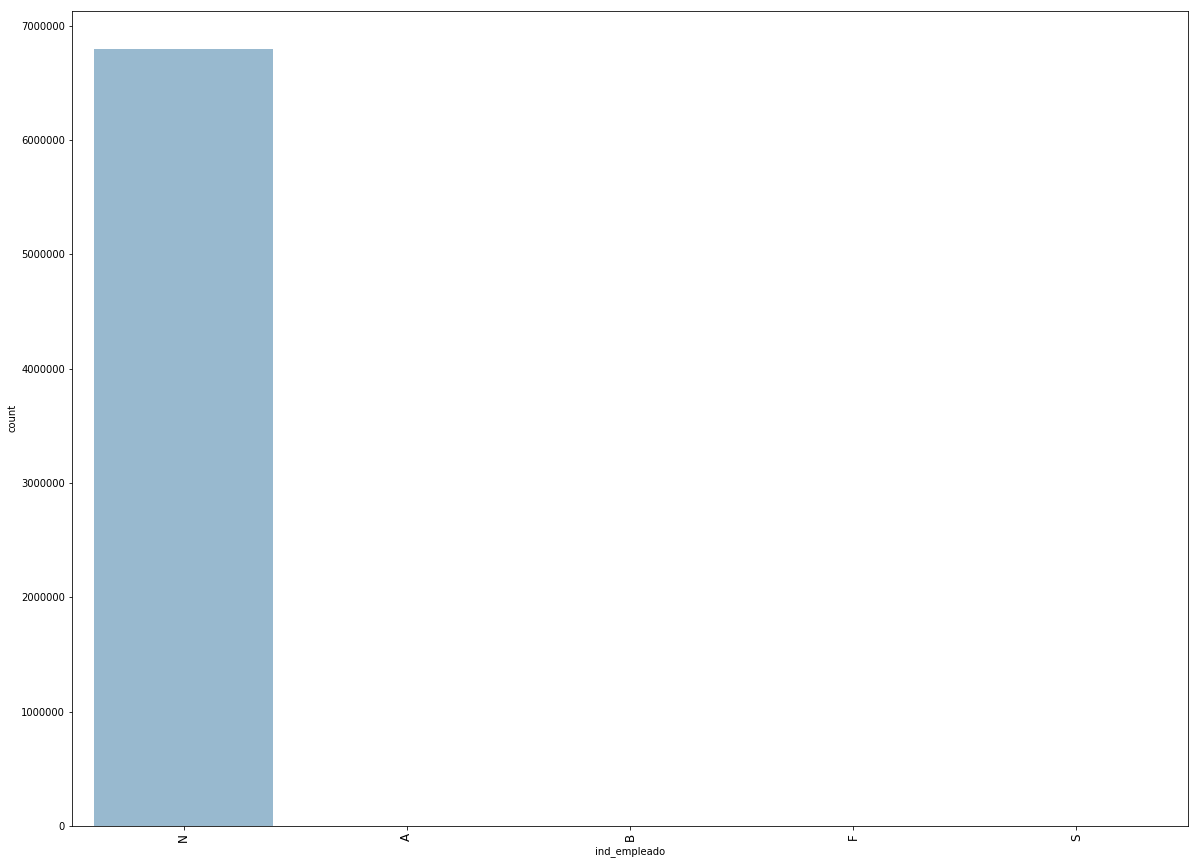

--------------------------------------------------
col: pais_residencia


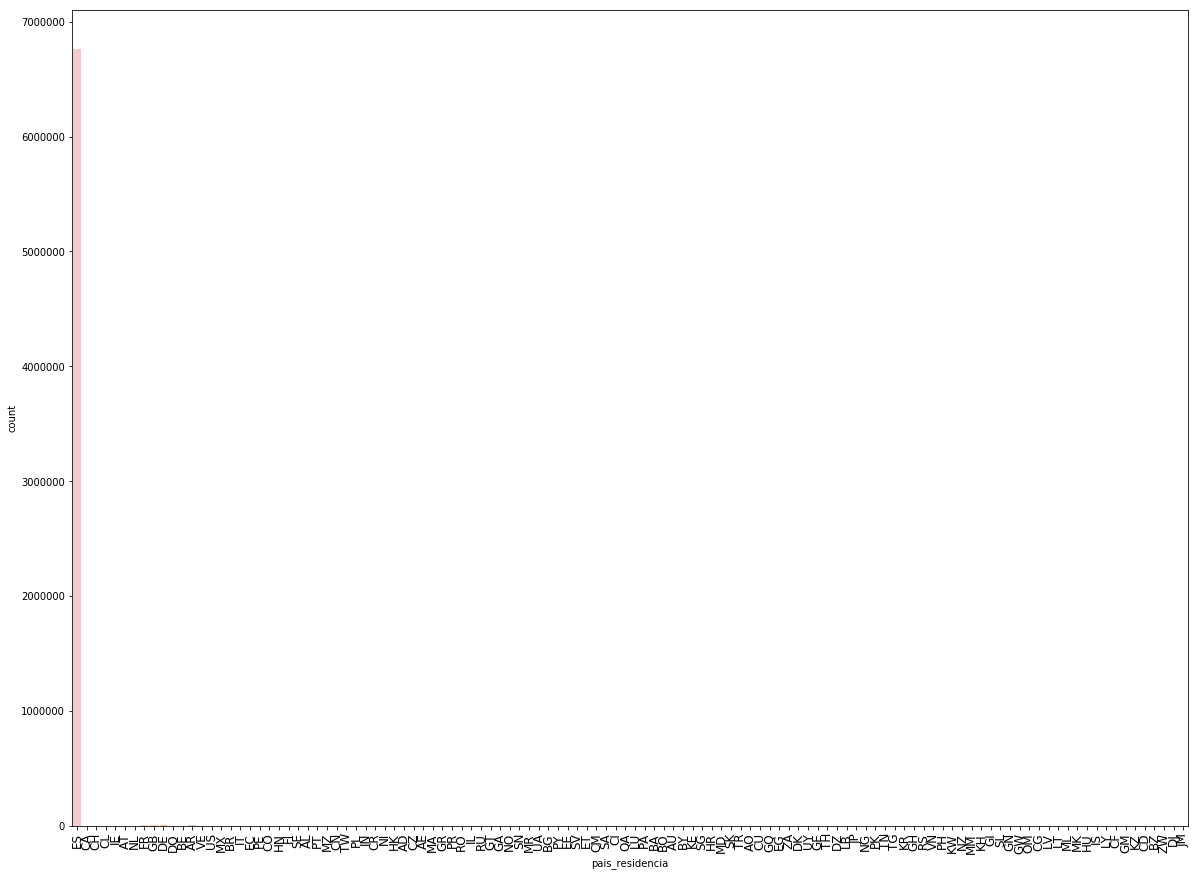

--------------------------------------------------
col: sexo


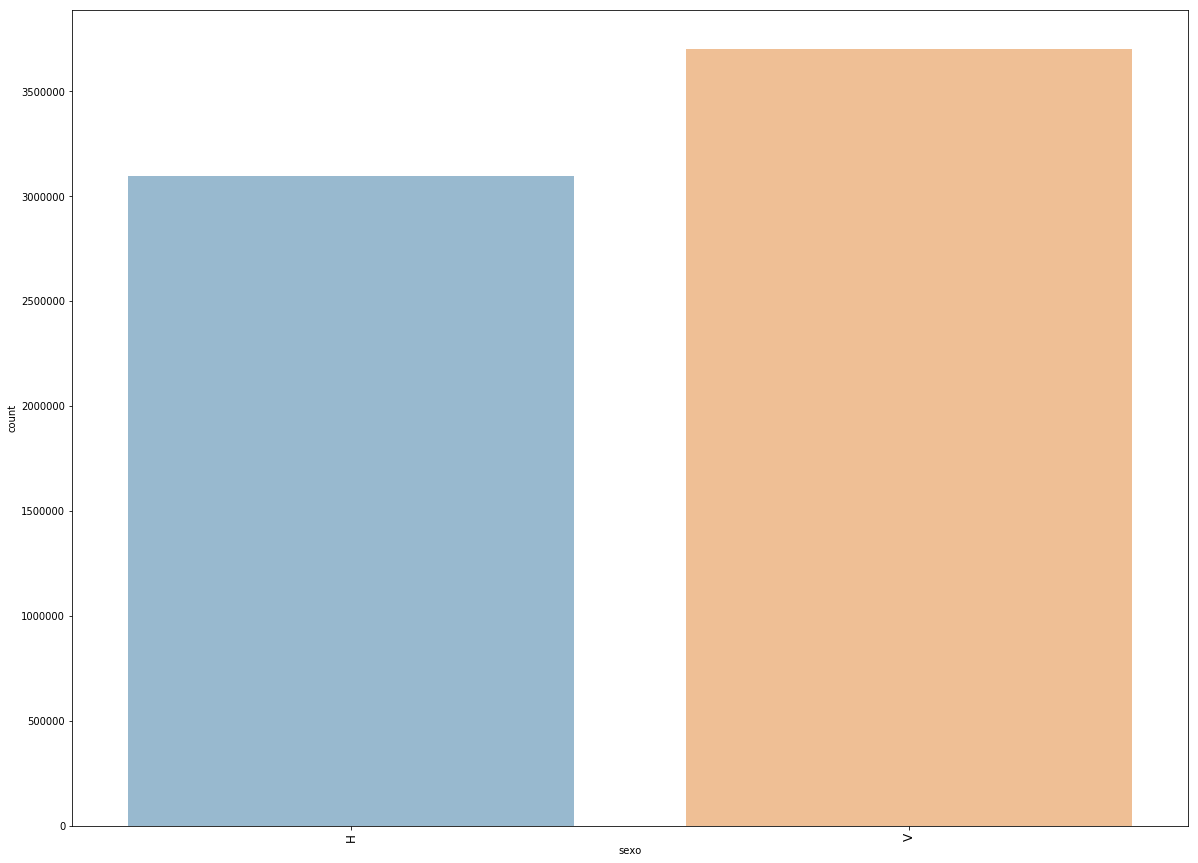

--------------------------------------------------
col: age


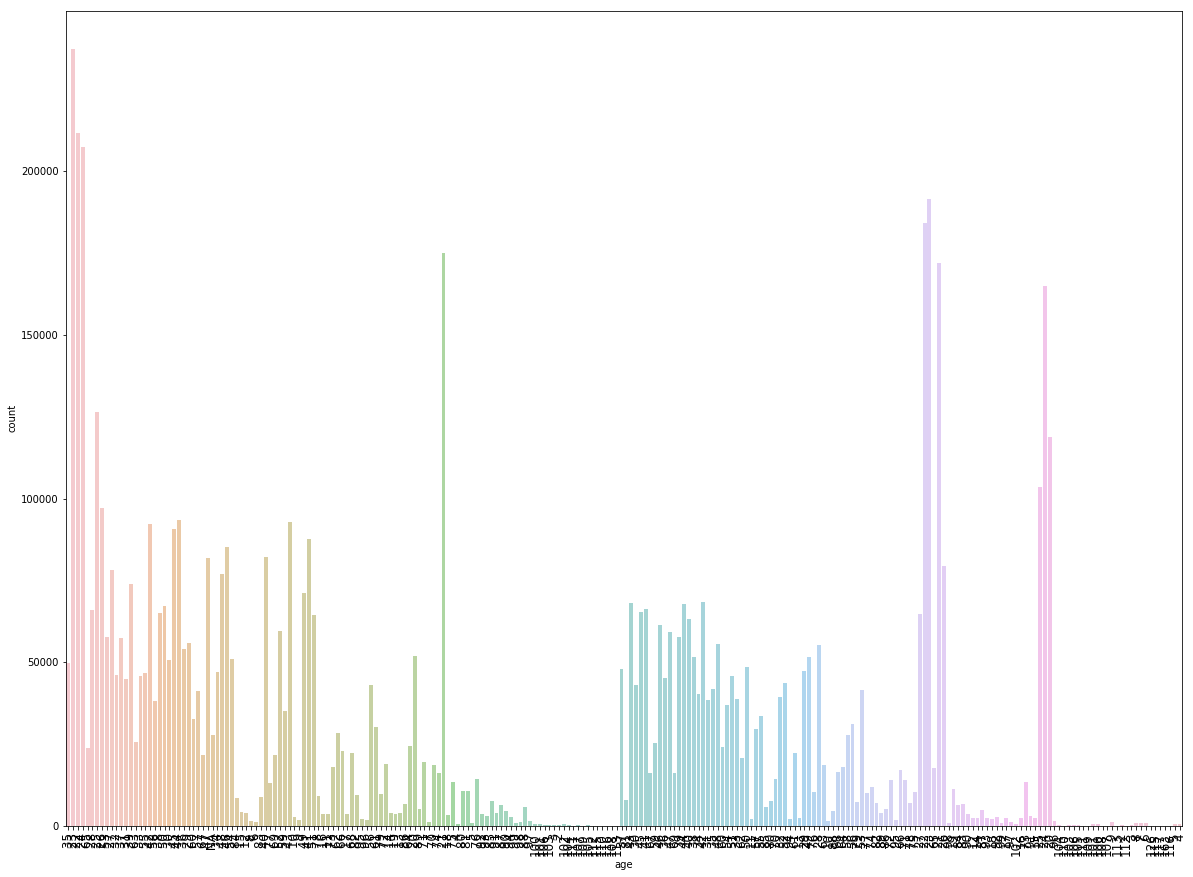

--------------------------------------------------
col: fecha_alta


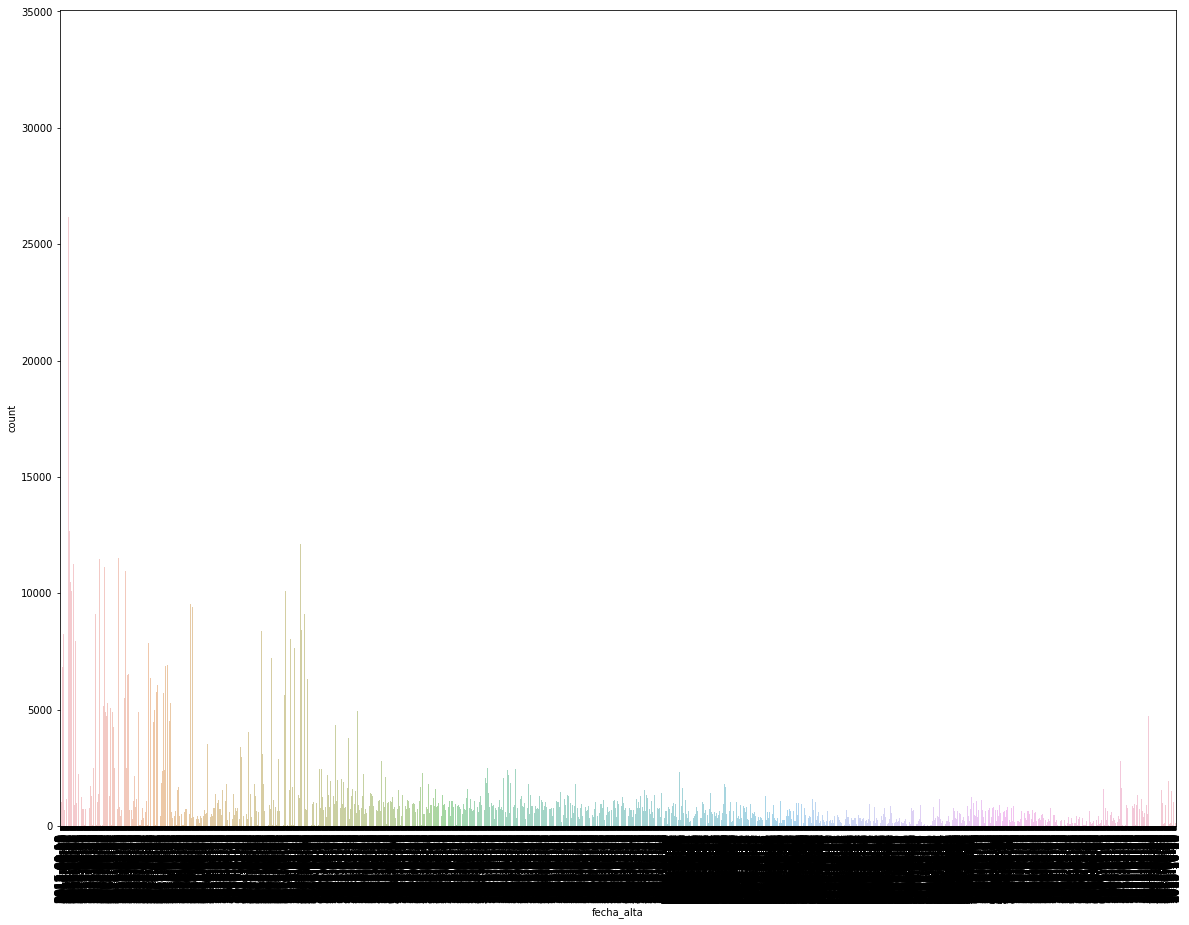

--------------------------------------------------
col: ind_nuevo


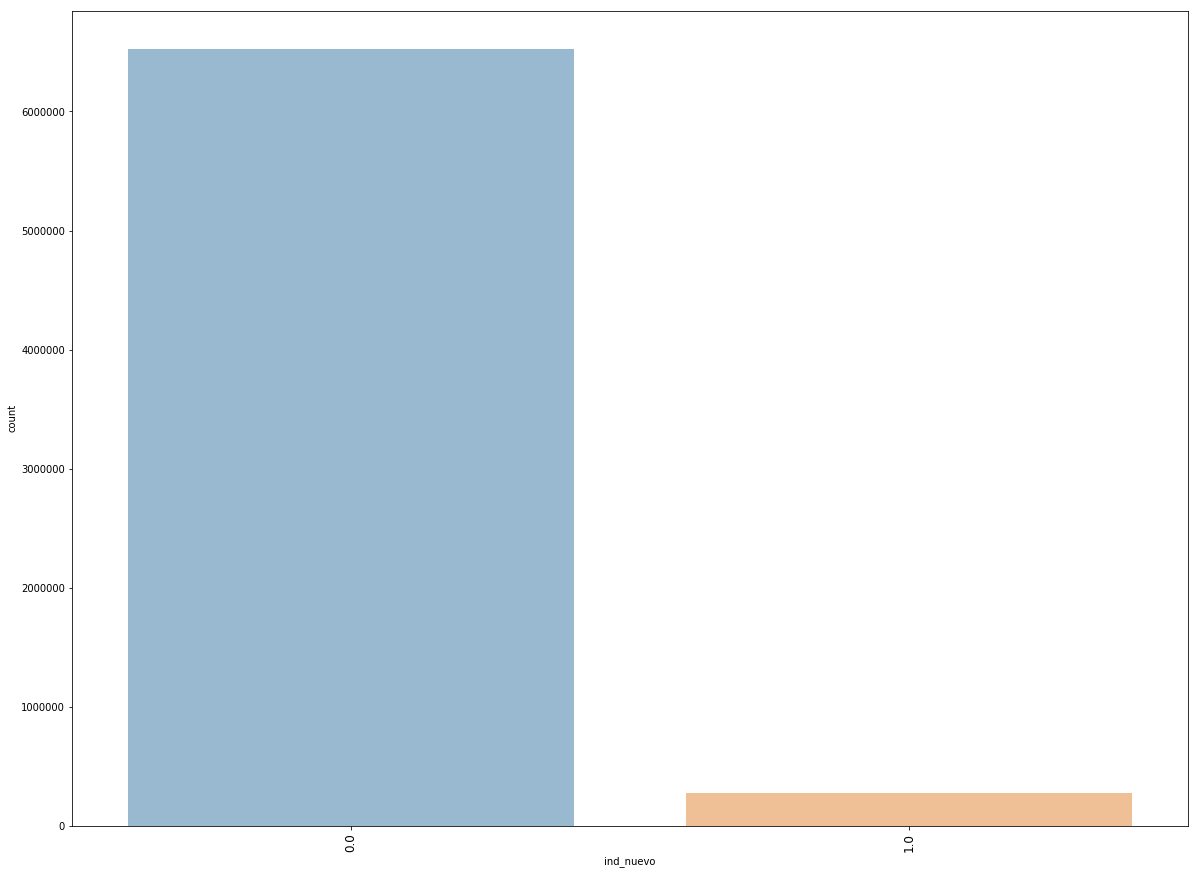

--------------------------------------------------
col: antiguedad


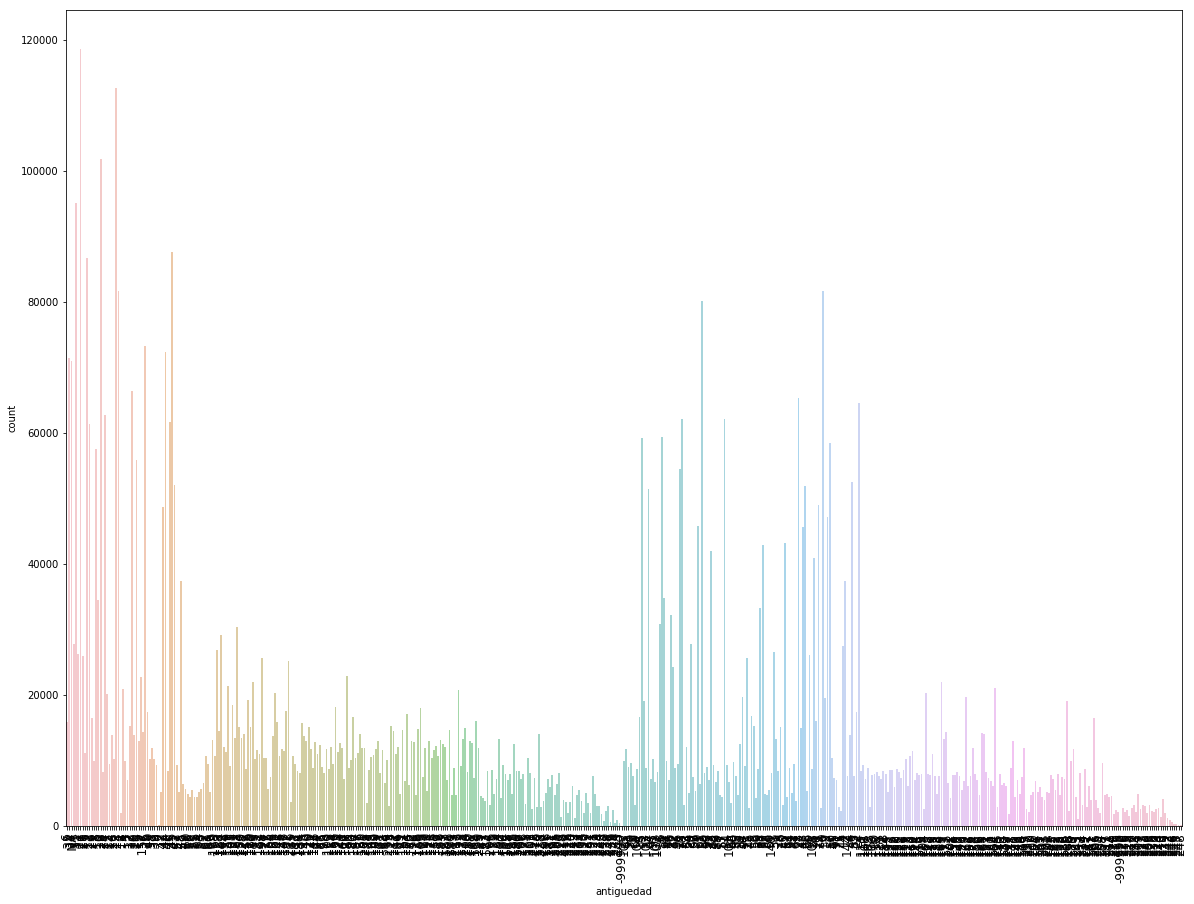

--------------------------------------------------
col: indrel


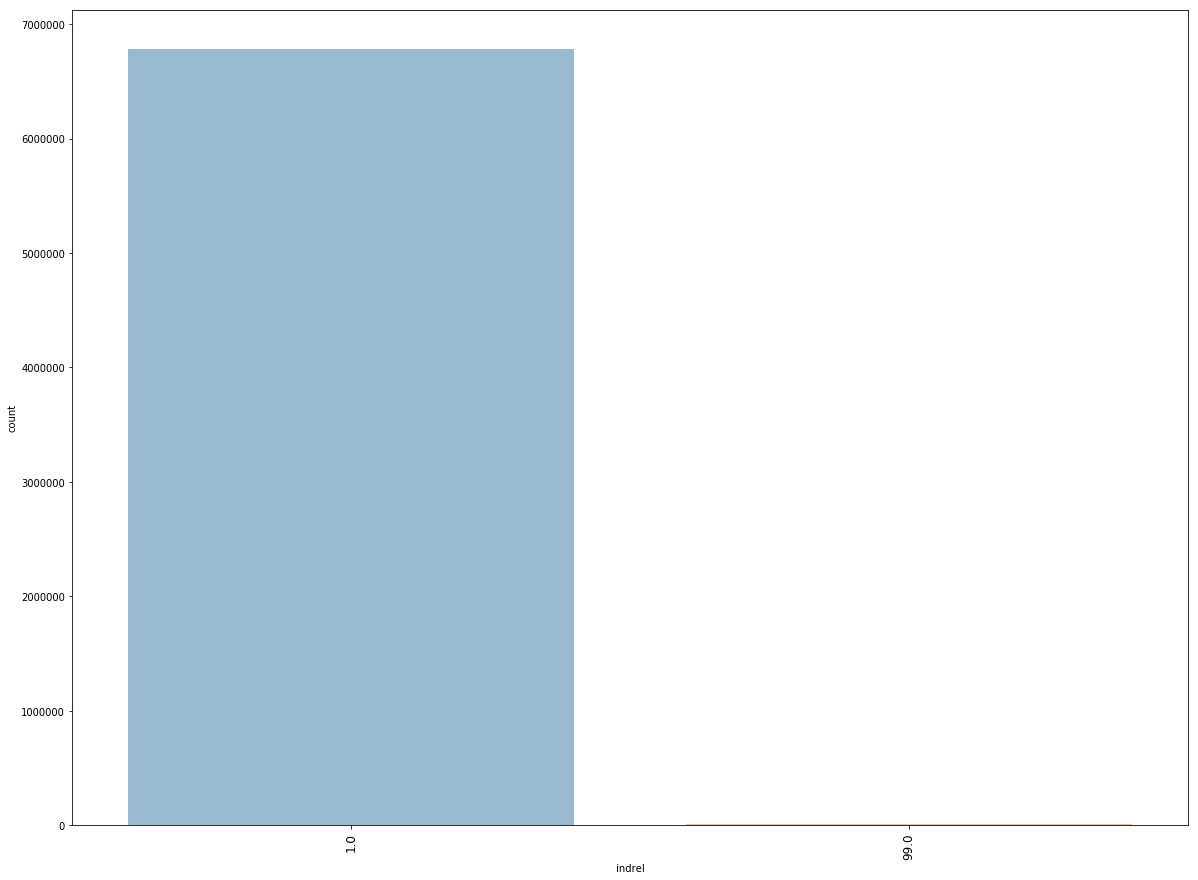

--------------------------------------------------
col: ult_fec_cli_1t


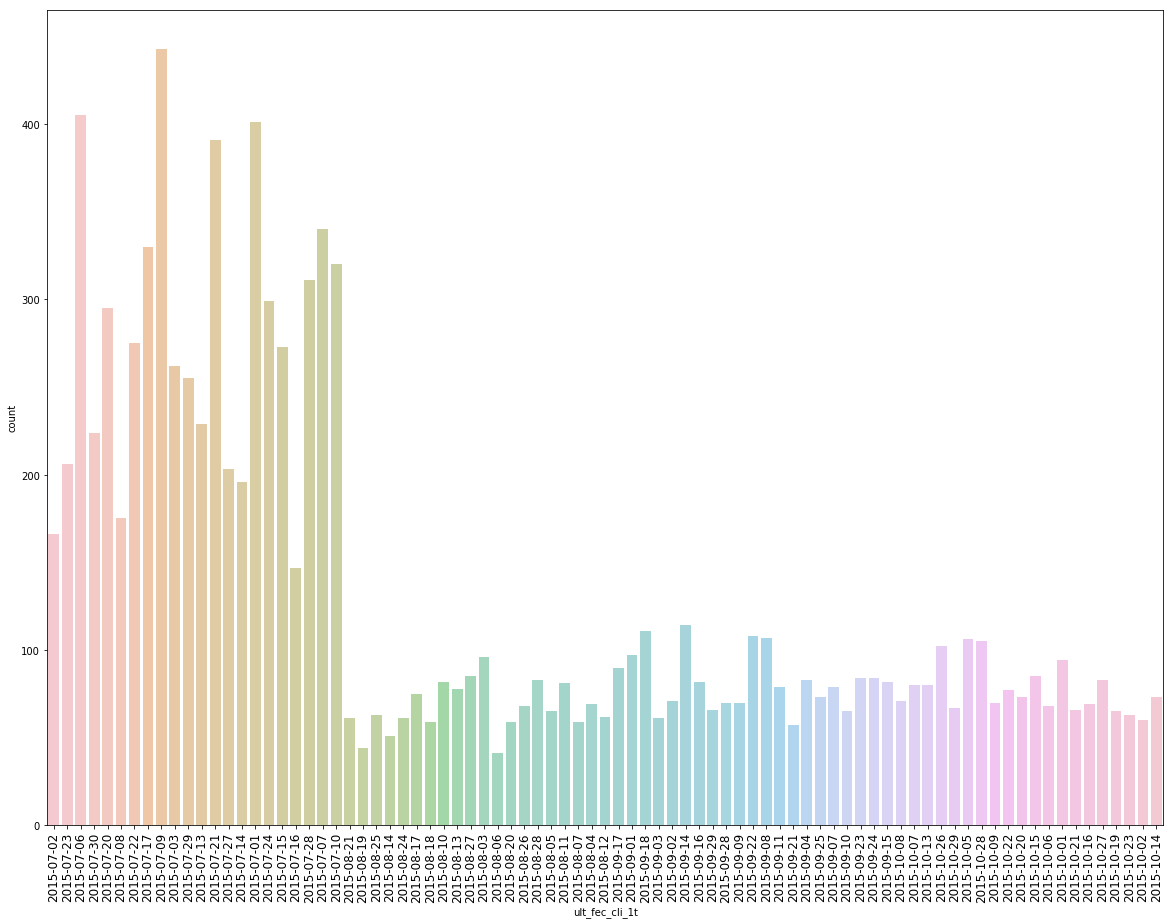

--------------------------------------------------
col: indrel_1mes


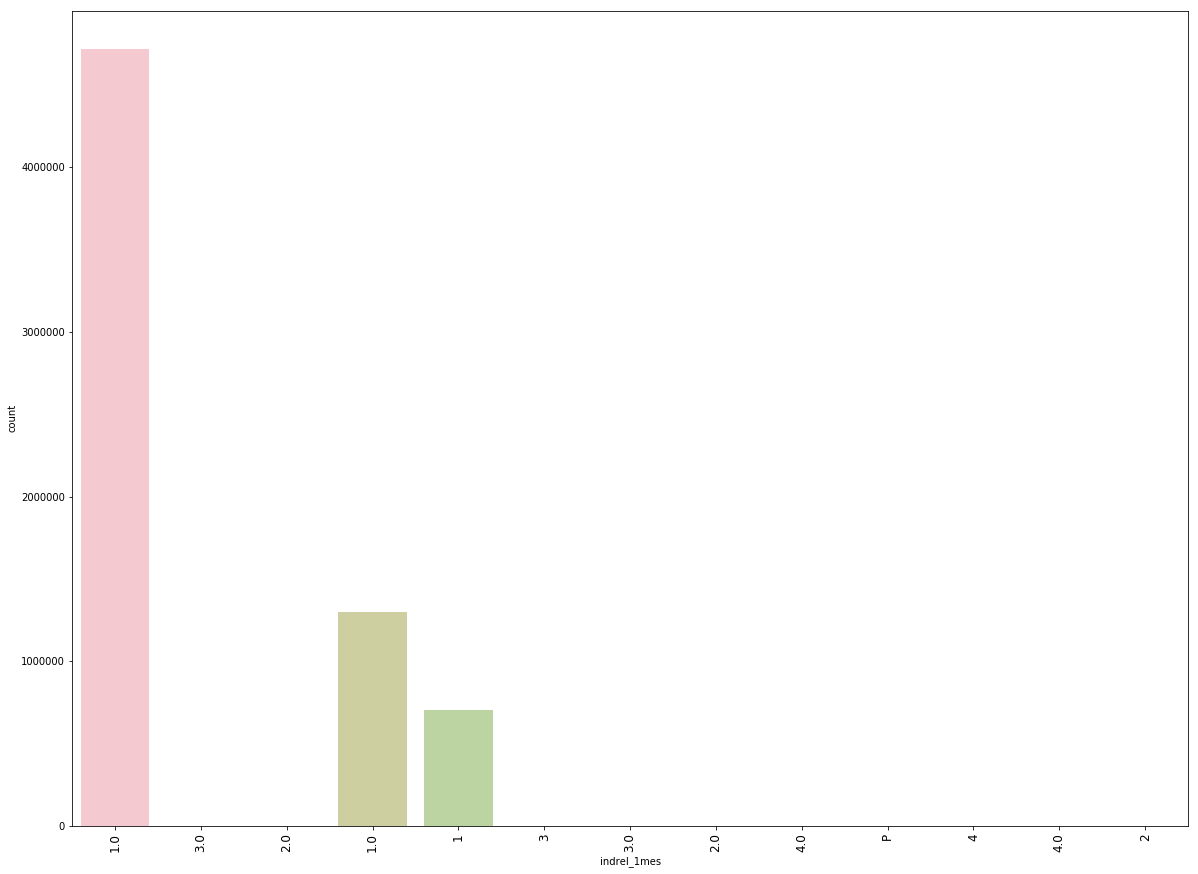

--------------------------------------------------
col: tiprel_1mes


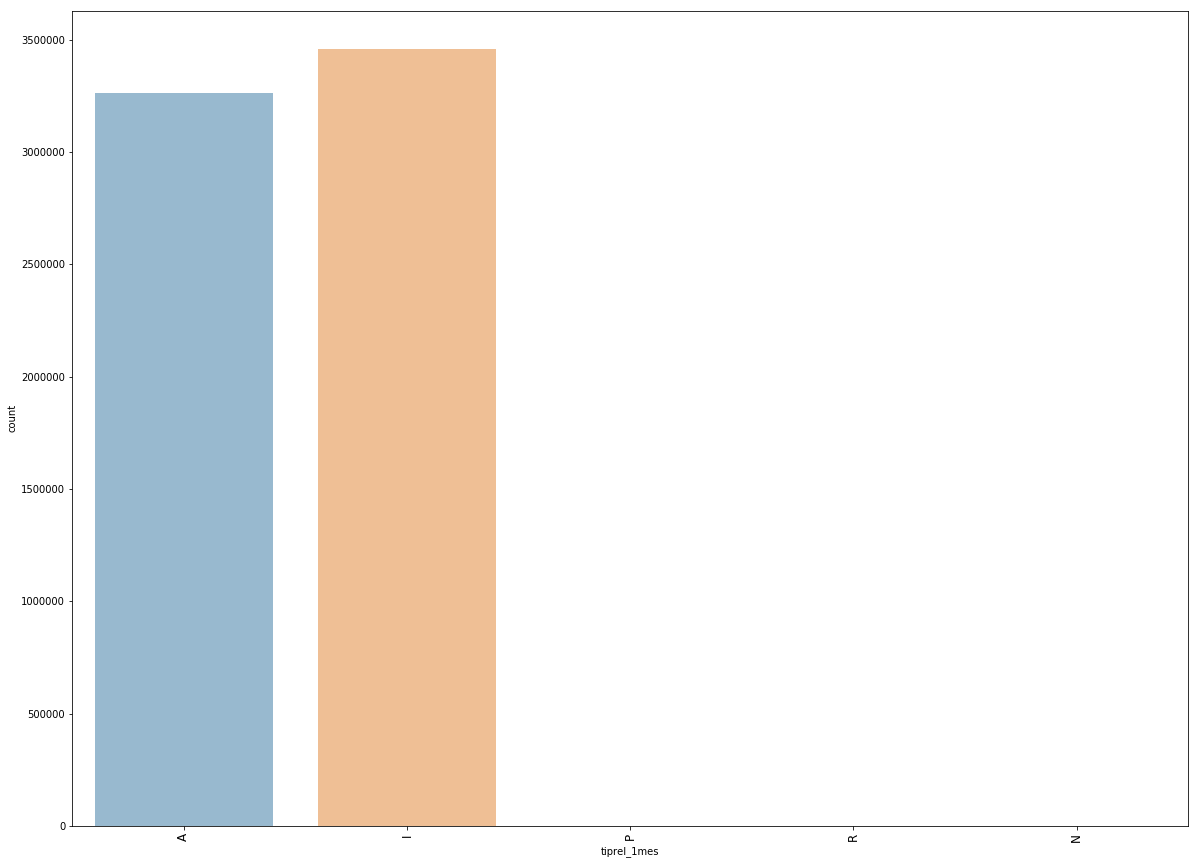

--------------------------------------------------
col: indresi


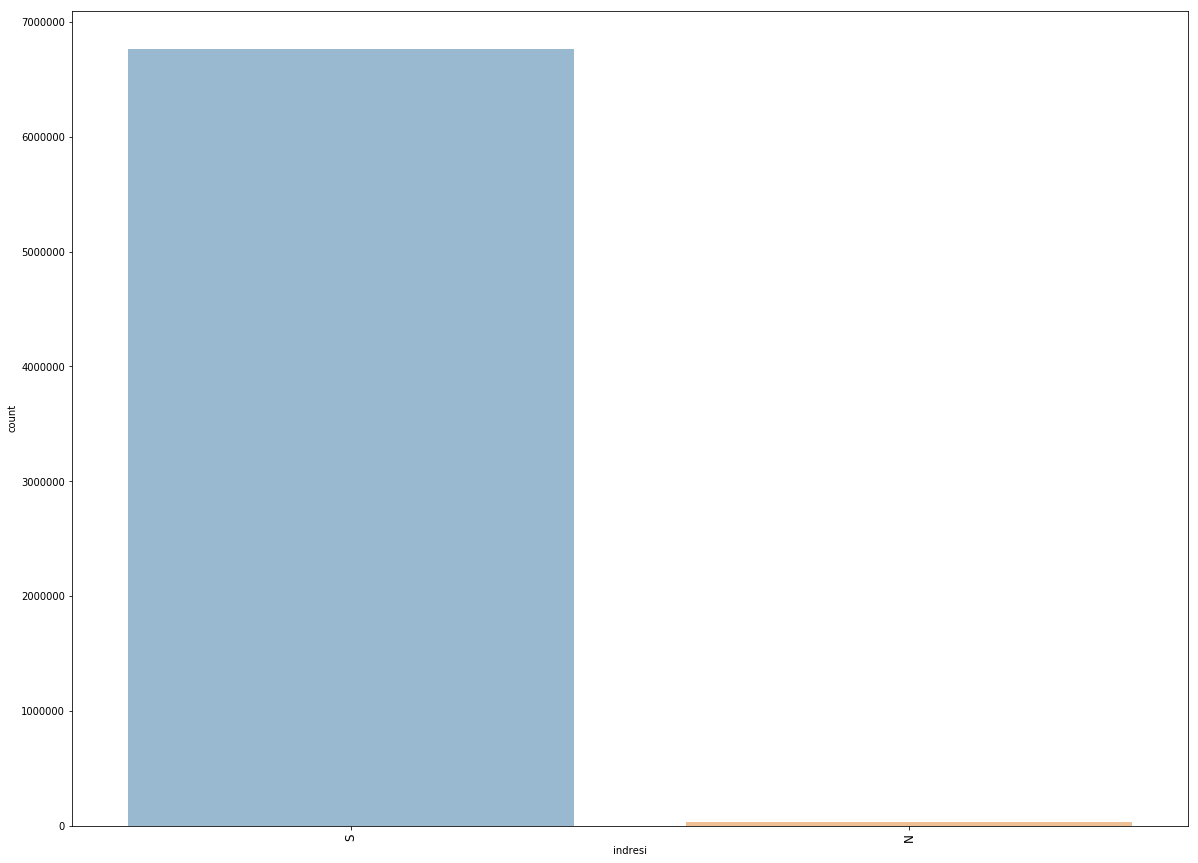

--------------------------------------------------
col: indext


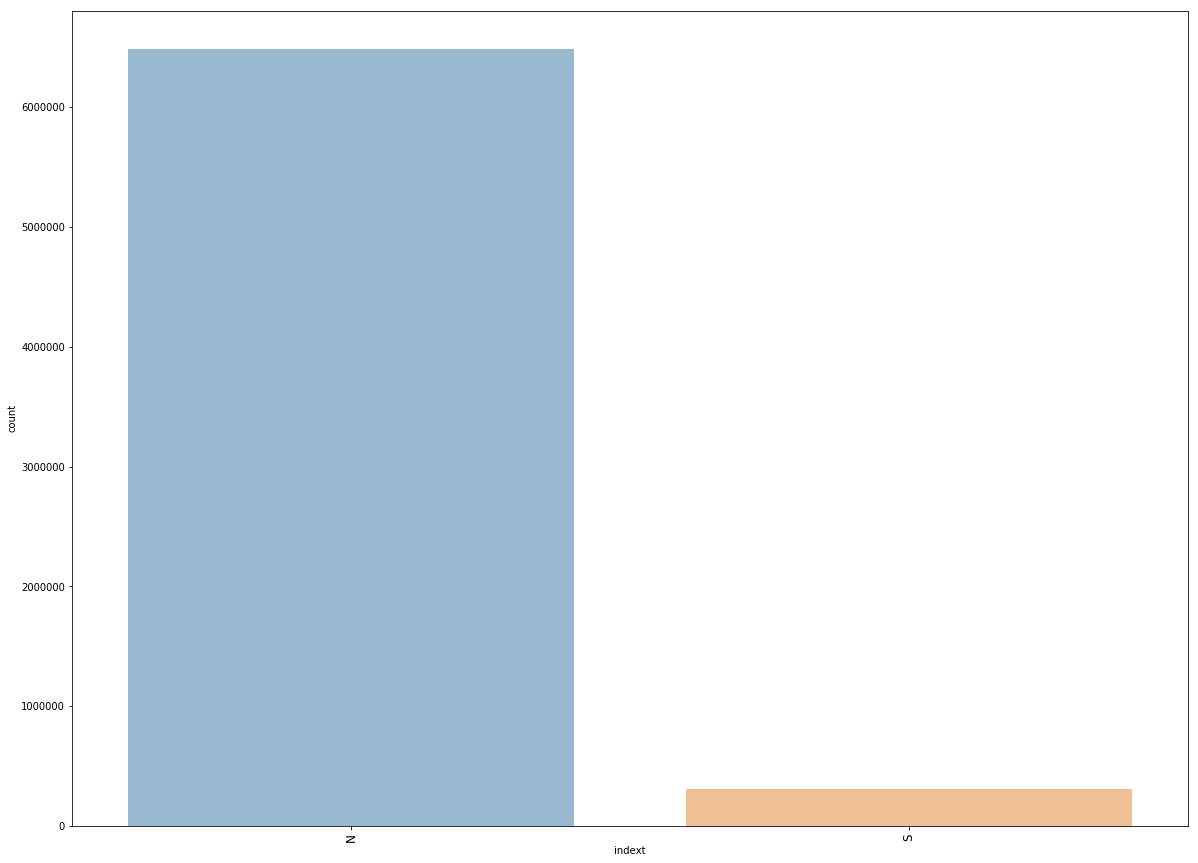

--------------------------------------------------
col: conyuemp


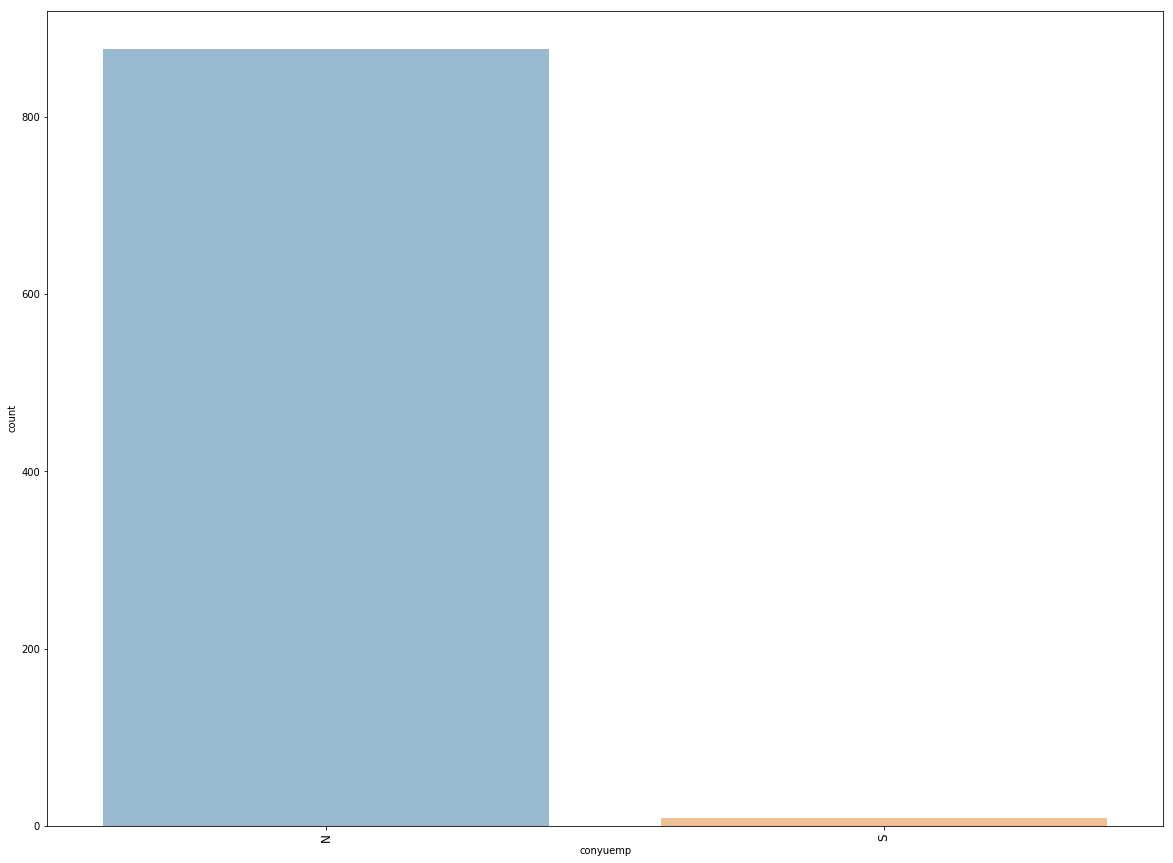

--------------------------------------------------
col: canal_entrada


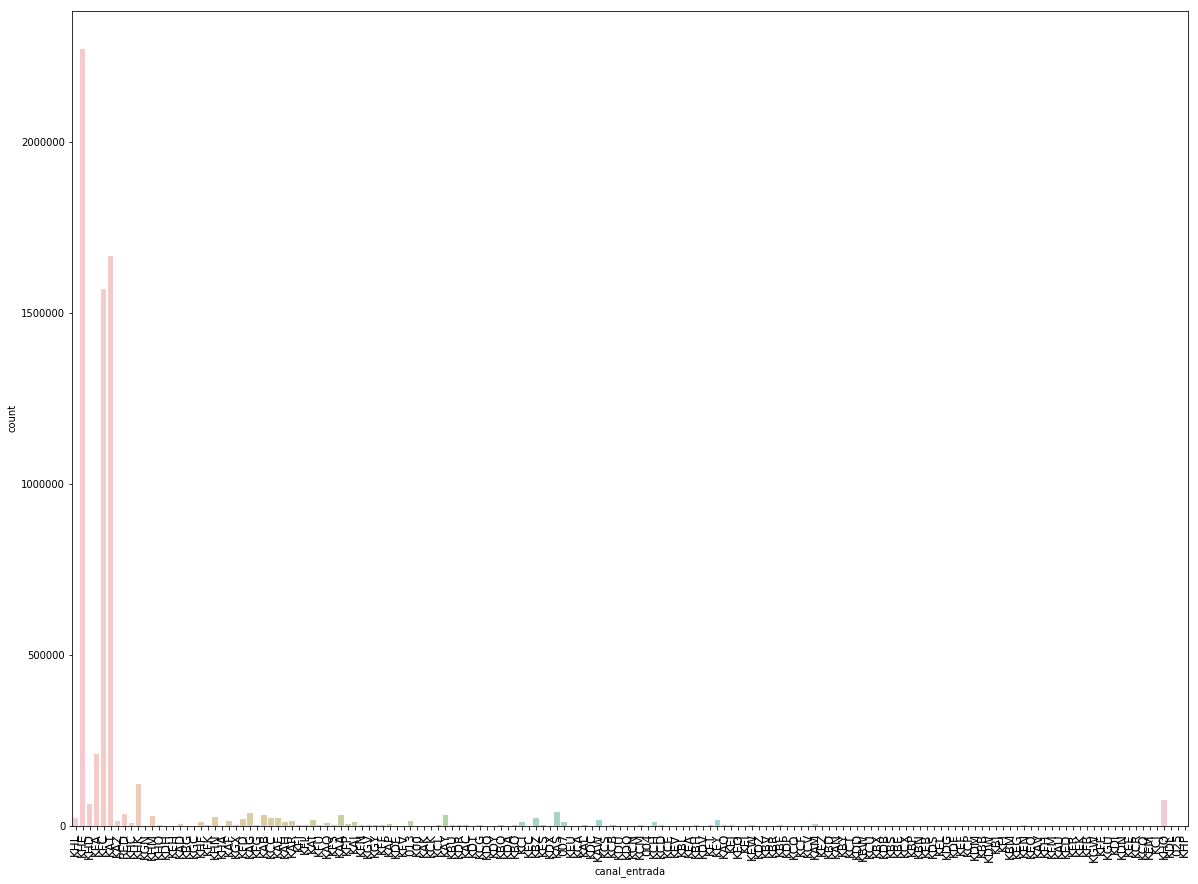

--------------------------------------------------
col: indfall


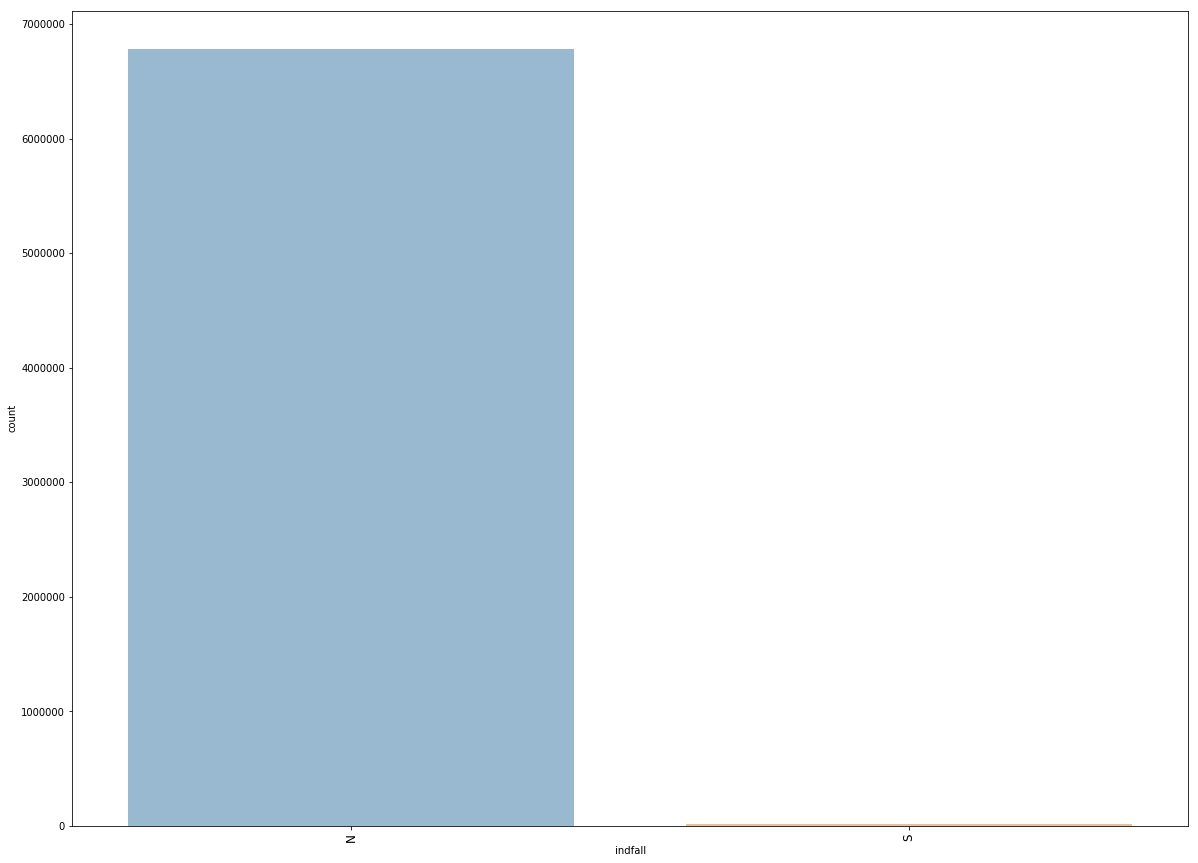

--------------------------------------------------
col: tipodom


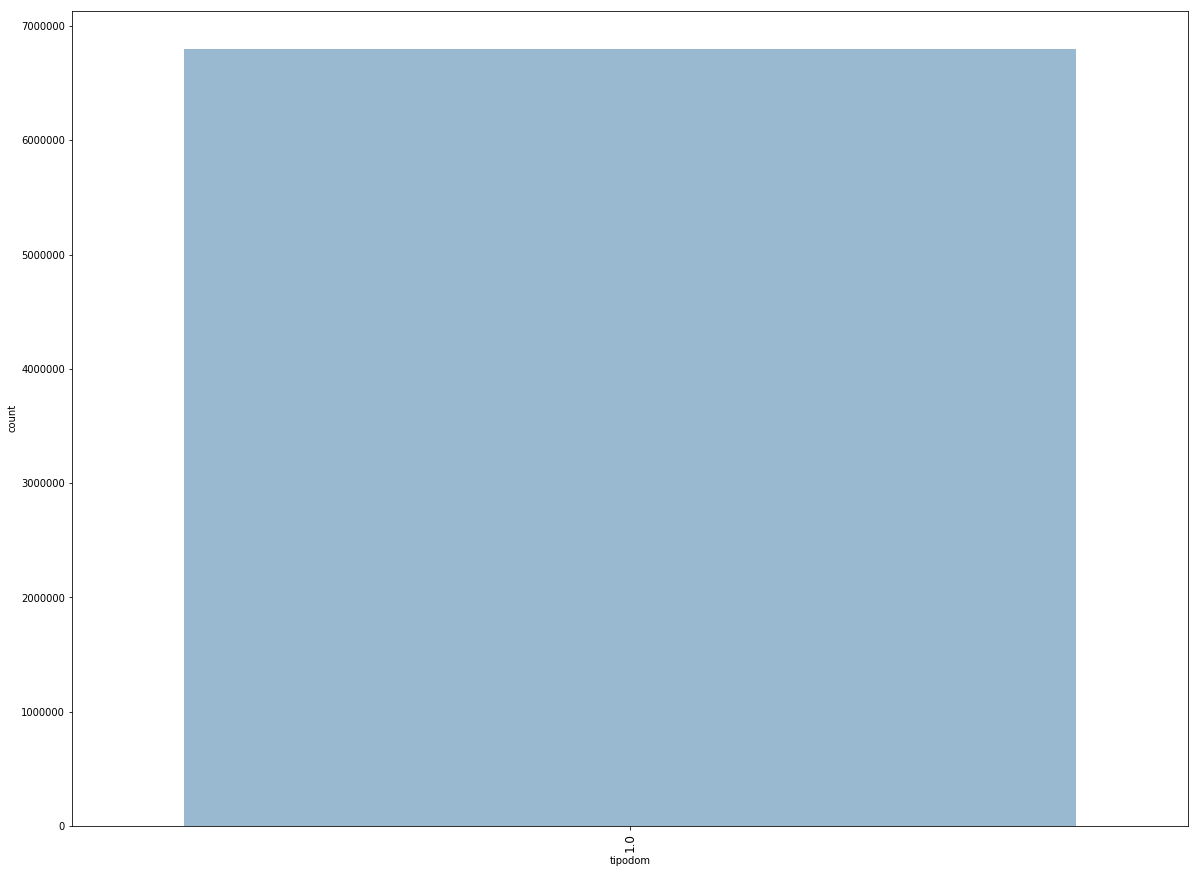

--------------------------------------------------
col: cod_prov


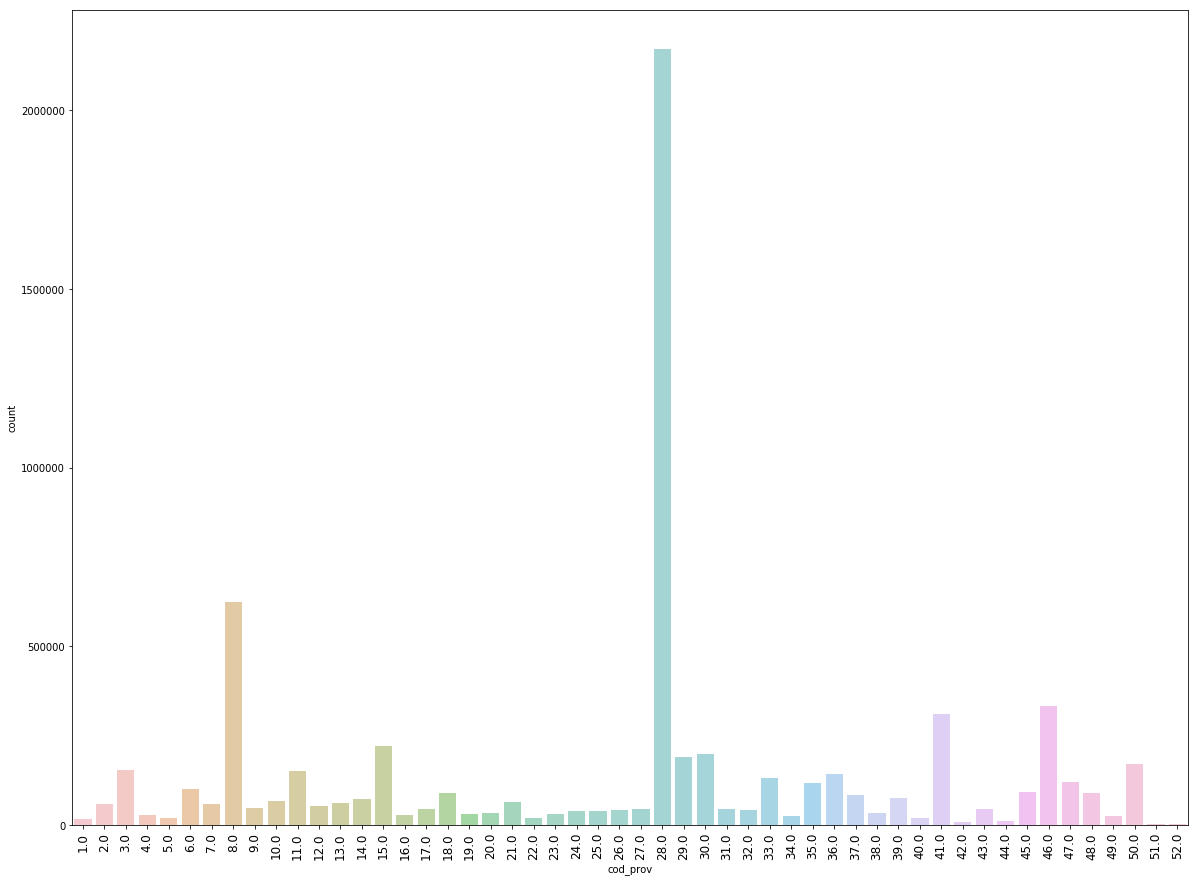

--------------------------------------------------
col: nomprov


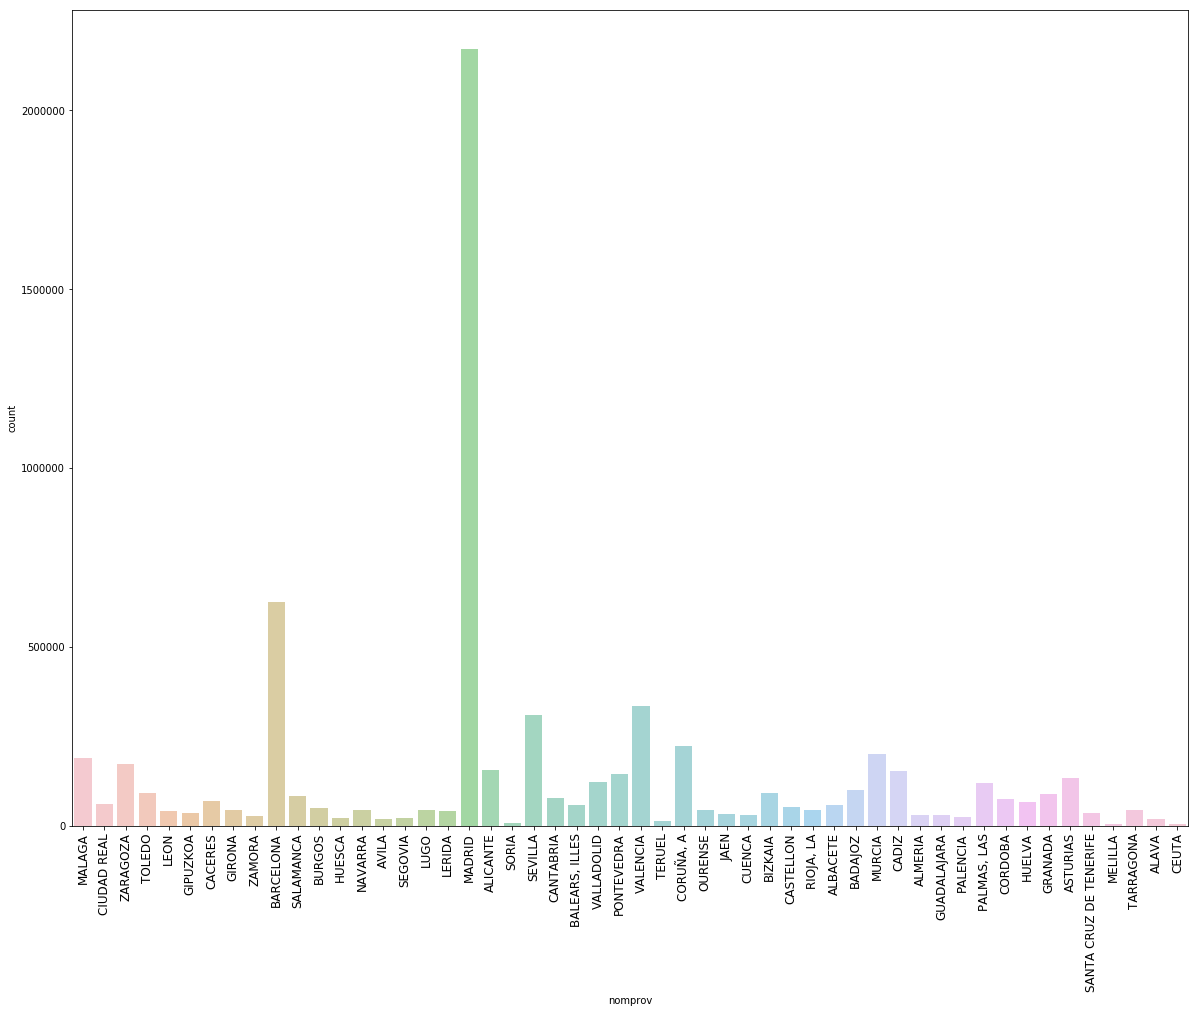

--------------------------------------------------
col: ind_actividad_cliente


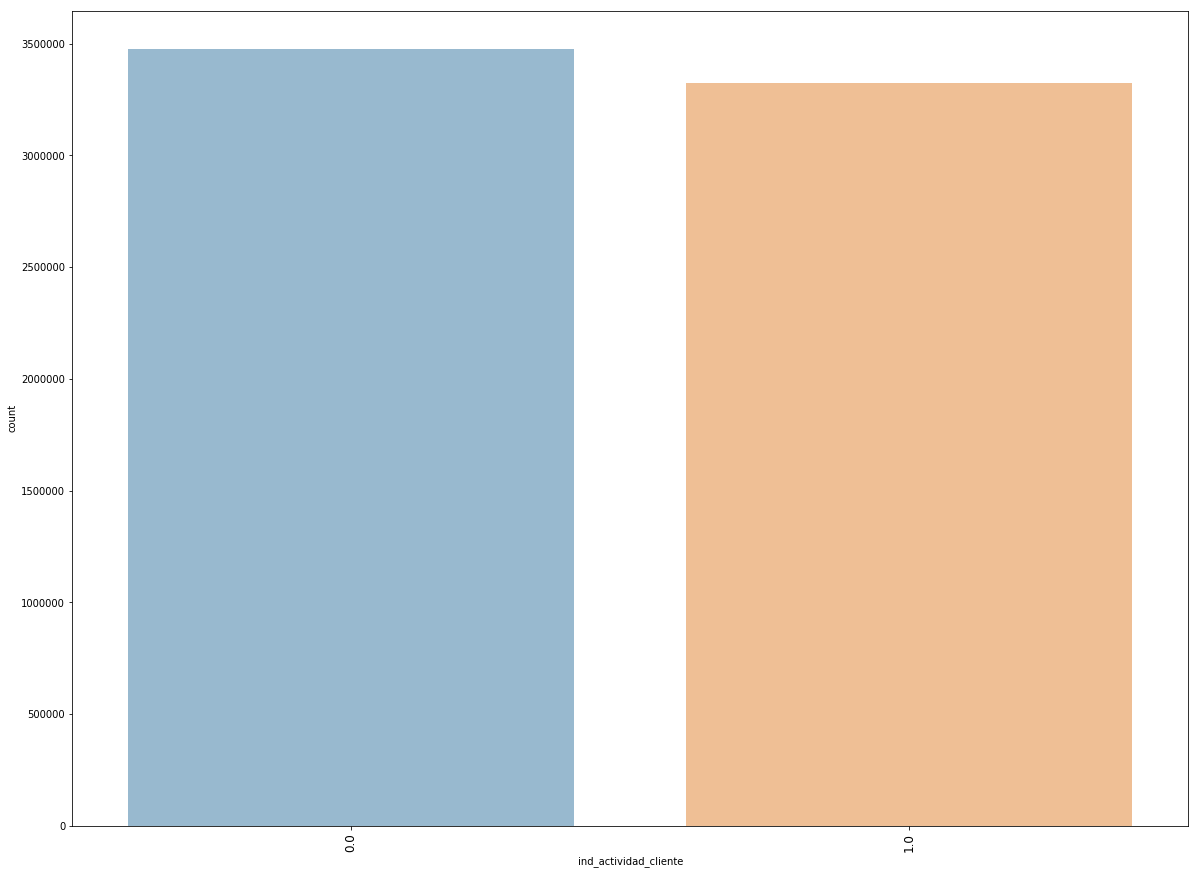

--------------------------------------------------
col: segmento


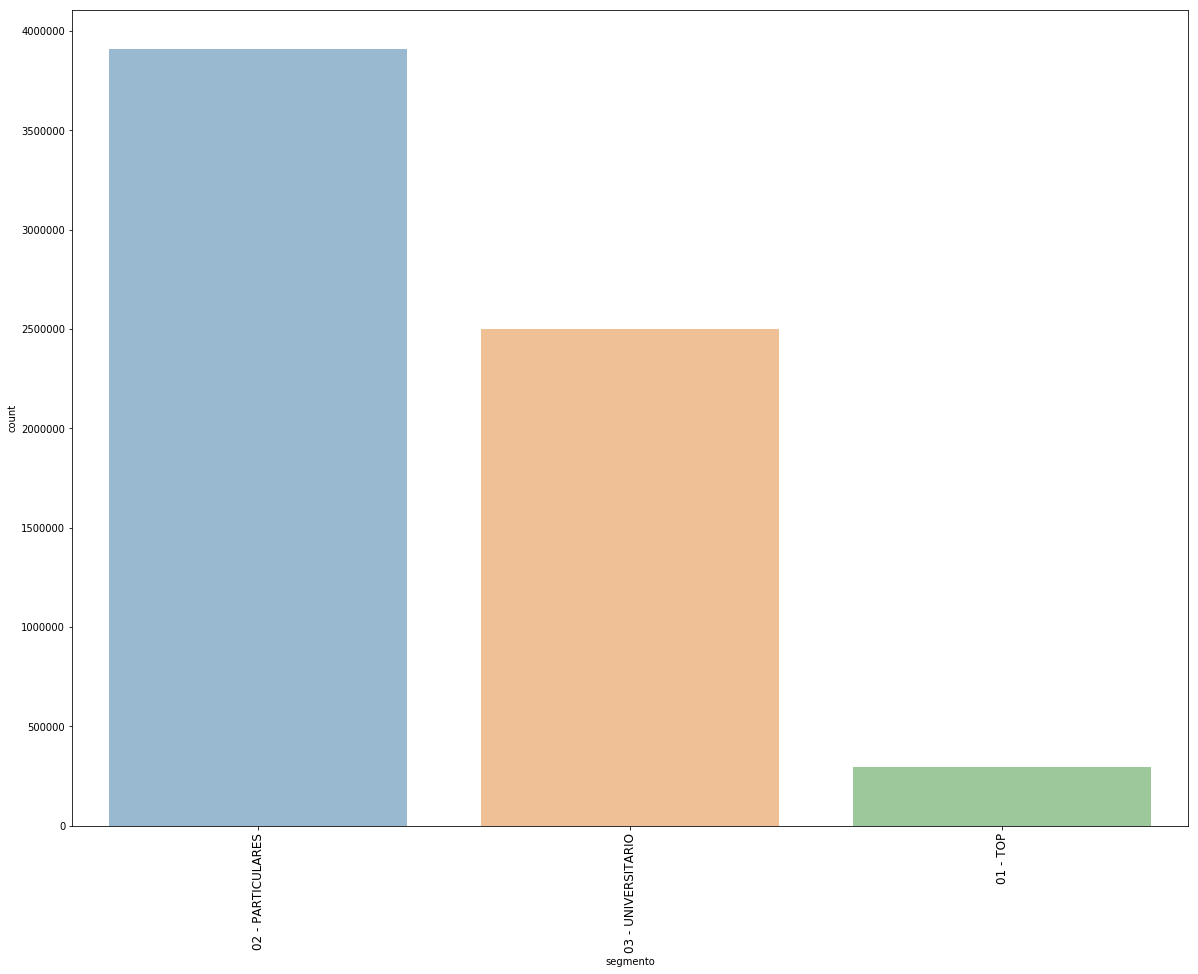

In [13]:
skip_cols=["ncodpers","renta"]
draw_cols=['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento']
for col in draw_cols:
    if col in skip_cols:
        continue
    print("-"*50)
    print("col:",col)
    
    f,ax=plt.subplots(figsize=(20,15))
    plt.xticks(fontsize=12,rotation=90)
    sns.countplot(x=col,data=train,alpha=0.5)
    plt.show()

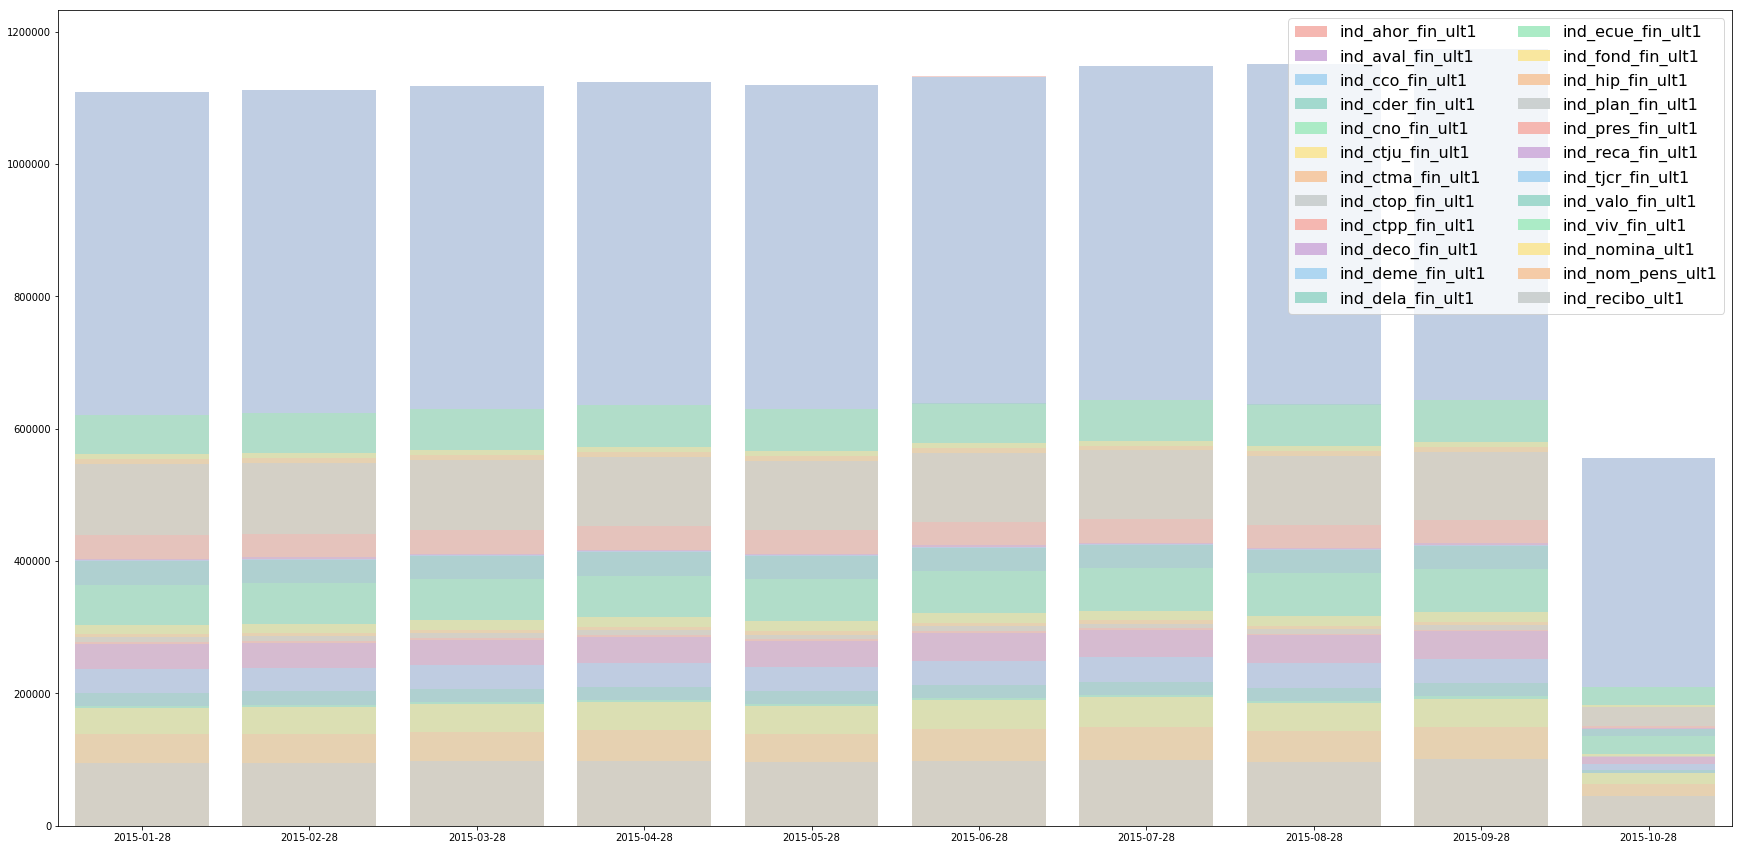

In [34]:
# 코드 1-9. 월별 금융 제품 보유 여부를 누적 막대 그래프로 시각화

# 날짜 데이터를 기준으로 분석하기 위하여, 날짜 데이터 별도 추출
months = np.unique(train['fecha_dato']).tolist()
# 제품 변수 24개 추출
label_cols = train.columns[24:].tolist()

label_over_time = []
size1=np.asarray(label_cols).shape[0]
for i in range(size1):
    # 매월, 각 제품 변수의 총합을 label_sum에 저장
    label_sum = train.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())
    
label_sum_over_time = []
for i in range(size1):
    # 누적 막대 그래프 형식으로 시각화 하기 위하여, 누적값을 계산
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
# 시각화를 위한 색깔 지정
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

# 시각화를 위한 준비
f, ax = plt.subplots(figsize=(30, 15))
for i in range(size1):
    # 24개 제품에 대하여 Histogram 그리기
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)

# 우측 상단에 Legend 추가하기
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(size1)], label_cols, loc=1, ncol = 2, prop={'size':16})

# 24개 금융 상품 신규 구매 데이터 생성하기

In [35]:
# 제품 변수를 prods에 list형태로 저장한다
prods = train.columns[24:].tolist()

# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환된다
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

# 날짜를 숫자로 변환하여 int_date에 저장한다
train['int_date'] = train['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag를 생성한다. 변수명에 _prev를 추가한다.
train_lag = train.copy()
train_lag['int_date'] += 1
train_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in train.columns]

# 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다. Lag 데이터의 int_date는 1 밀려있기 때문에, 저번달의 제품 정보가 삽입된다.
df_train = train.merge(train_lag, on=['ncodpers','int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다
del train, train_lag

# 저번달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체한다.
for prod in prods:
    prev = prod + '_prev'
    df_train[prev].fillna(0, inplace=True)

# 원본 데이터에서의 제품 보유 여부 – lag데이터에서의 제품 보유 여부를 비교하여 신규 구매 변수 padd를 구한다
for prod in prods:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_train[padd] = ((df_train[prod] == 1) & (df_train[prev] == 0)).astype(np.int8)

# 신규 구매 변수만을 추출하여 labels에 저장한다.
add_cols = [prod + '_add' for prod in prods]
labels = df_train[add_cols].copy()
labels.columns = prods
#labels.to_csv('../input/labels.csv', index=False)

In [ ]:
def date_to_int():
    Y,M,D=[int(a) for a in str_date.strip().split("-")]
    int_date=(int(Y)-2015)*12 +int(M)
    return int_date

In [ ]:
date_to

In [ ]:
label_over_time

In [ ]:
a=np.asarray(label_over_time)
for i in range(len(label_over_time)):
    print(a[i].sum())

In [ ]:
label_sum_over_time

In [ ]:
print(dims(label_over_time))
label_over_time


In [ ]:
label_over_time2=np.array(label_over_time)

In [ ]:
label_over_time2.shape

In [ ]:
t=np.round((np.random.randn(4,4)+3))
df=pd.DataFrame(t)
df=df.astype(int)

df2=pd.DataFrame({"a":["a","b","c","c","b","c"],"b":[1,1,1,2,2,4],"c":[5,5,5,2,2,4],"c":[0,1,1,2,0,0]})
df2.groupby("a")["b"].sum()


In [ ]:
df2.groupby("a")["b"].agg("sum").tolist()

In [ ]:
df2

In [ ]:
train.tail(100)

In [ ]:
a=np.random.randn(10)*10
a=a.astype(int)
sum=[]
for i in range(len(a)):
    sum.append(a[i:].sum())

In [ ]:
print(sum)
print(a)

In [ ]:
a.sum()

In [ ]:
train